# `tips`

Food servers' tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule

|Variable Name | Variable Meaning |
|---  |---                 |
| total_bill | Total bill (cost of the meal), including tax, in US dollars |
| tip | Tip (gratuity) in US dollars |
| sex | Sex of person paying for the meal (0=male, 1=female) |
| smoker | Smoker in party? (0=No, 1=Yes) |
| day | Day of Week (4=Thur, 5=Fri, 6=Sat, 7=Sun) |
| time | Dinner, Lunch |
|size  | Size of the party |

In [54]:
# Import necessary libraries, and modify DataFrame for convenience
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = pd.read_csv('tips.csv')
tips['day'].replace({4:'Thur', 5:'Fri', 6:'Sat', 7:'Sun'}, inplace = True)
tips['smoker'].replace({0:'No', 1:'Yes'}, inplace = True)
tips['sex'].replace({0:'Male', 1:'Female'}, inplace = True)
tips['tip_percent'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Male,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Female,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Female,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Female,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Male,No,Sun,Dinner,4,0.146808


### Exercise 1
<span  style="color:purple; font-size:16px">On which day of the week does the waiter serve the largest parties, on average? There are several ways to answer this question. Try to find at least two different solutions.</span>


In [93]:
# Answer
method_1=tips.groupby(['day']).agg({'size': ['mean']})
method_1.columns = ['avg_size']
print(method_1[method_1.avg_size == method_1.avg_size.max()])

     avg_size
day          
Sun  2.842105


In [95]:
method_2=tips.groupby(['day'])['size'].describe()[['mean']]
method_2.columns = ['avg_size']
method_2[method_2.avg_size == method_2.avg_size.max()]

,avg_size
day,
Sun,2.842105


### Exercise 2
<span  style="color:purple; font-size:16px">Calculate the average bill by day and time and round to 1 decimal place. What day-time combination has the highest average bill? What day-time combination has the lowest average bill?</span>


In [46]:
# Answer
grouped_multiple = tips.groupby(['day', 'time']).agg({'total_bill': ['mean']})
grouped_multiple.columns = ['avg_bill']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple= grouped_multiple.round(1)

print(grouped_multiple.sort_values(by='avg_bill', ascending=False))

    day    time  avg_bill
3   Sun  Dinner      21.4
2   Sat  Dinner      20.4
0   Fri  Dinner      19.7
4  Thur  Dinner      18.8
5  Thur   Lunch      17.7
1   Fri   Lunch      12.8


From the above table we can see 'Sun Dinner' combination has the hightest average bill and 'Fri Lunch' has the lowest average bill.

### Exercise 3
<span  style="color:purple; font-size:16px">Extract the average bill for Friday lunch from the result of Exercise 2.</span>

In [98]:
# Answer
grouped_multiple.loc[(grouped_multiple['day'] == 'Fri') & (grouped_multiple['time'] <'Lunch')]

,day,time,avg_bill
0,Fri,Dinner,19.7


### Exercise 4
<span  style="color:purple; font-size:16px">Use `.groupby()` to make a visualization comparing the distribution of tip percentages left by males and females. How do they compare?</span>

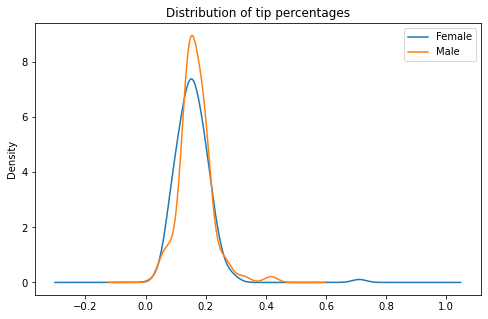

In [112]:
# Answer
ax=tips.groupby('sex')['tip_percent'].plot(kind= 'density',
                                           legend=True,
                                           title='Distribution of tip percentages',
                                           figsize=(8,5))



If we do the groupby on 'sex' and plot the density graph of the 'tip_percent' we get the distribution of the values. From the graph we can see the tip_percent of males is higher than females.

### Exercise 5
<span  style="color:purple; font-size:16px">Make a visualization that shows the average tip percentage as a function of table size. Describe the relationship between party size and average tip percentage?</span>

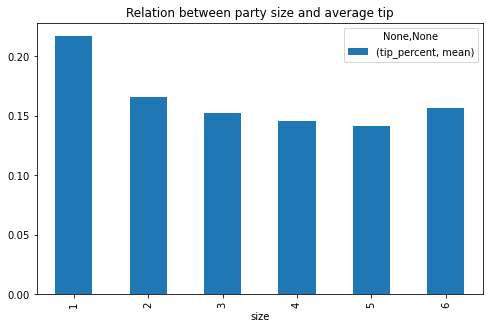

In [108]:
# Answer
avg_tip = tips.groupby(['size']).agg({'tip_percent': ['mean']})
avg_tip.plot(kind= 'bar',legend=True,title='Relation between party size and average tip',figsize=(8,5))
plt.show()

Graph shows that as party size increases the average tip percentage value is decreasing. 

### Exercise 6
<span  style="color:purple; font-size:16px">Calculate the average total bill by day, time, and party size. Display the results in a pivot table.</span>

In [61]:
# Answer
tips.pivot_table(index='day',
                  columns=('time','size'),
                  values='total_bill',
                  aggfunc='mean').round(1)

time Dinner                               Lunch                              
size      1     2     3     4     5     6     1     2     3     4     5     6
day                                                                          
Fri     NaN  17.8   NaN  40.2   NaN   NaN   8.6  13.1  16.0   NaN   NaN   NaN
Sat     5.2  16.8  25.5  29.9  28.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN
Sun     NaN  17.6  22.2  26.7  27.0  48.2   NaN   NaN   NaN   NaN   NaN   NaN
Thur    NaN  18.8   NaN   NaN   NaN   NaN  10.1  15.1  19.2  30.0  41.2  30.4

### Exercise 7
<span  style="color:purple; font-size:16px">Make a bar chart showing the average total bill by party size, day, and time. (Place party size on the $x$-axis)</span>

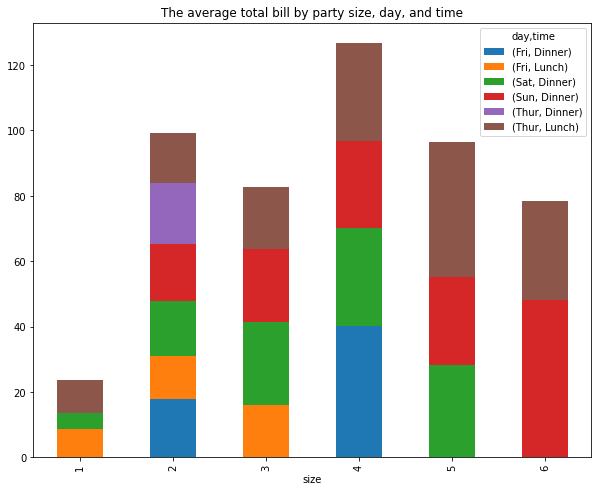

In [110]:
# Answer
tips.pivot_table(index='size',
                  columns=('day','time'),
                  values='total_bill',
                  aggfunc='mean').plot(kind='bar',
                                      legend=True,
                                      stacked=True,
                                      figsize=(10,8),
                                      title='The average total bill by party size, day, and time')
plt.show()

### Exercise 8
<span  style="color:purple; font-size:16px">Make a bar chart showing the tip percent by party size, and day. (Place day on the $x$-axis, average `tip_percent` on the $y$-axis, and the bars colored by party `size`. Use `pivot_table()` to reshape the data appropriately.)</span>

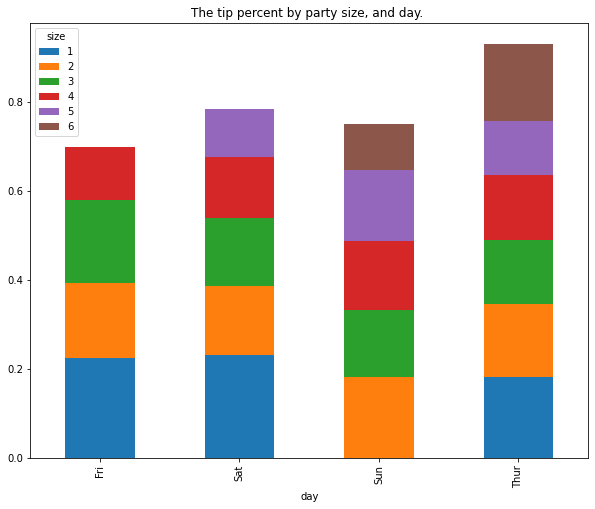

In [111]:
# Answer
tips.pivot_table(index='day',
                  columns='size',
                  values='tip_percent',
                  aggfunc='mean').plot(kind='bar',
                                      legend=True,
                                      stacked=True,
                                      figsize=(10,8),
                                      title='The tip percent by party size, and day. ')
plt.show()

### Exercise 9
<span  style="color:purple; font-size:16px">Create the table from exercise 6 using `.groupby()` and `.unstack()` (Hint: You need to use `unstack()` twice to unstack each level of the index. Literally, your code will have `some_stuff.unstack().unstack()`)</span>

In [68]:
# Answer
tips.groupby(['day', 'time','size']).agg({'total_bill': ['mean']}).round(1).unstack().unstack()

total_bill                                                            \
           mean                                                             
size          1            2            3            4            5         
time     Dinner Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner Lunch   
day                                                                         
Fri         NaN   8.6   17.8  13.1    NaN  16.0   40.2   NaN    NaN   NaN   
Sat         5.2   NaN   16.8   NaN   25.5   NaN   29.9   NaN   28.2   NaN   
Sun         NaN   NaN   17.6   NaN   22.2   NaN   26.7   NaN   27.0   NaN   
Thur        NaN  10.1   18.8  15.1    NaN  19.2    NaN  30.0    NaN  41.2   

                   
                   
size      6        
time Dinner Lunch  
day                
Fri     NaN   NaN  
Sat     NaN   NaN  
Sun    48.2   NaN  
Thur    NaN  30.4

### Exercise 10
<span  style="color:purple; font-size:16px">Calculate the joint probability distribution between day of the week and party size using the `pd.crosstab()` function and appropriate arguments.</span>


In [73]:
# Answer
pd.crosstab(index = tips['day'],
           columns = tips['size'],
           normalize = True,
           margins = True)

size,1,2,3,4,5,6,All
day,,,,,,,
Fri,0.004098,0.065574,0.004098,0.004098,0.000000,0.000000,0.077869
Sat,0.008197,0.217213,0.073770,0.053279,0.004098,0.000000,0.356557
Sun,0.000000,0.159836,0.061475,0.073770,0.012295,0.004098,0.311475
Thur,0.004098,0.196721,0.016393,0.020492,0.004098,0.012295,0.254098
All,0.016393,0.639344,0.155738,0.151639,0.020492,0.016393,1.000000
